# Inital visualiztion notebook
Used for initial visualization...

## Packages

In [1]:
%config IPCompleter.use_jedi = False

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import random
from skimage.io import imread
from collections import defaultdict
from matplotlib import colors

## Draw single sample

In [3]:
basedir_train_img = "./../data/raw/train_images/"
path_train_label = "./../data/raw/train.csv"
basedir_test_img = "./../data/raw/test_images/"

In [4]:
img_names = [x for x in os.listdir(basedir_train_img)]

In [5]:
sample = random.choice(img_names)
sample

'fa9c2ed.jpg'

In [6]:
path_sample = os.path.join(basedir_train_img, sample)
path_sample

'./../data/raw/train_images/fa9c2ed.jpg'

In [7]:
img = imread(path_sample)

In [8]:
print("type:", type(img))
print("dtype:", img.dtype)
print("shape:", img.shape)

type: <class 'numpy.ndarray'>
dtype: uint8
shape: (1400, 2100, 3)


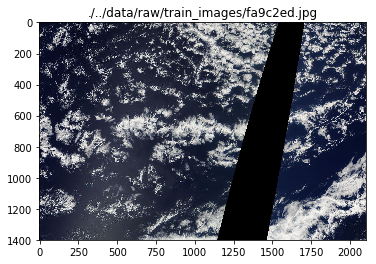

In [9]:
plt.imshow(img)
plt.title(path_sample)
plt.show()

## Dev labels

In [10]:
f = open(path_train_label)
header = f.readline()
sample_label = f.readline()
f.close()

In [11]:
header

'Image_Label,EncodedPixels\n'

In [12]:
sample_label[:100]

'0011165.jpg_Fish,264918 937 266318 937 267718 937 269118 937 270518 937 271918 937 273318 937 274718'

In [13]:
name, label = sample_label.split(',')[0].split("_")
name, label

('0011165.jpg', 'Fish')

In [14]:
segment_str = sample_label.split(',')[1]
segment_str[:100]

'264918 937 266318 937 267718 937 269118 937 270518 937 271918 937 273318 937 274718 937 276118 937 2'

In [15]:
labels = defaultdict(dict)
with open(path_train_label) as f:
    header = f.readline()
    for line in f.readlines():
        n, l = line.split(',')[0].split('_')
        s = line.split(',')[1].replace('\n','')
        if s:
            labels[n][l] = s

In [16]:
print(name)
print(labels[name].keys())
for k in labels[name]:
    print(k, len(labels[name][k]))

0011165.jpg
dict_keys(['Fish', 'Flower'])
Fish 11449
Flower 14650


In [17]:
classes = sorted(set([c for n in labels.keys() for c in labels[n].keys()]))
classes

['Fish', 'Flower', 'Gravel', 'Sugar']

In [18]:
label_enc = {}
for i, c in enumerate(classes):
    label_enc[c] = 2 ** i
label_enc

{'Fish': 1, 'Flower': 2, 'Gravel': 4, 'Sugar': 8}

### Draw parts

In [19]:
IMG_SHAPE = (1400, 2100, 3)
IMG_ROWS = IMG_SHAPE[0]
IMG_COLS = IMG_SHAPE[1]
IMG_CHANNEL = IMG_SHAPE[2]
IMG_SIZE = (IMG_ROWS, IMG_COLS)

In [20]:
print(name)
print(labels[name].keys())

mask = np.zeros(IMG_SIZE, dtype=np.int).flatten()
for label, seg_str in labels[name].items():
    label_num = label_enc[label]
    if seg_str:
        segment = np.array(seg_str.split(' ')).astype(np.int).reshape(-1, 2)
        for (start, length) in segment:
            mask[start:start + length] += label_num
mask = mask.reshape(IMG_SIZE, order='F')

0011165.jpg
dict_keys(['Fish', 'Flower'])


In [21]:
print(np.unique(mask))

[0 1 2 3]


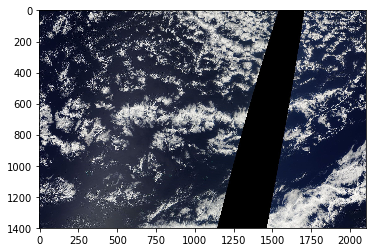

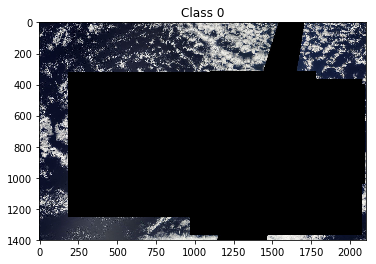

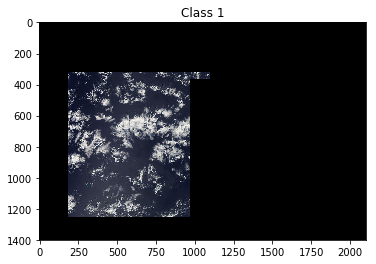

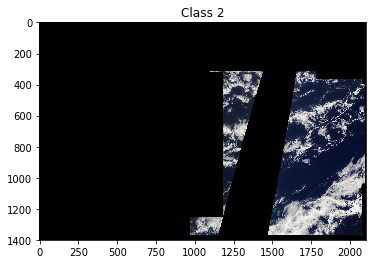

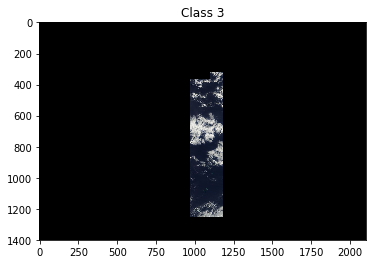

In [22]:
plt.imshow(img)
plt.show()
for i in np.unique(mask):
    img_c = img.copy()
    img_c[mask != i] = 0
    plt.imshow(img_c)
    plt.title("Class {}".format(i))
    plt.show()

## Color respective parts

In [23]:
palette = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728',
           '#9467bd', '#8c564b', '#e377c2', '#7f7f7f',
           '#bcbd22', '#17becf']

In [24]:
label_enc_color = {}
for i, k in enumerate(label_enc.keys()):
    label_enc_color[k] = list(colors.to_rgb(palette[i]))
label_enc_color

{'Fish': [0.12156862745098039, 0.4666666666666667, 0.7058823529411765],
 'Flower': [1.0, 0.4980392156862745, 0.054901960784313725],
 'Gravel': [0.17254901960784313, 0.6274509803921569, 0.17254901960784313],
 'Sugar': [0.8392156862745098, 0.15294117647058825, 0.1568627450980392]}

Fish: 932312
Flower: 1156107
Gravel: 0
Sugar: 0


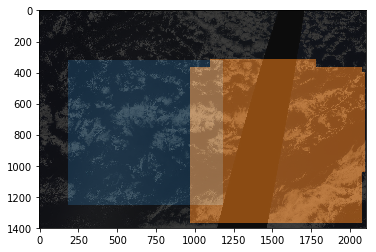

In [25]:
plt.imshow(img, alpha=0.8)
for label in classes:
    code = label_enc[label]
    color = label_enc_color[label]
    img_l = np.zeros(IMG_SHAPE)
    mask_c = (mask & code == code)
    area = mask_c.sum()
    print("{}: {}".format(label, area))
    if area:
        img_l[mask_c] = color
        plt.imshow(img_l, alpha=0.5)
plt.show()

## All in one

043e76c.jpg
['Fish', 'Flower', 'Gravel', 'Sugar']


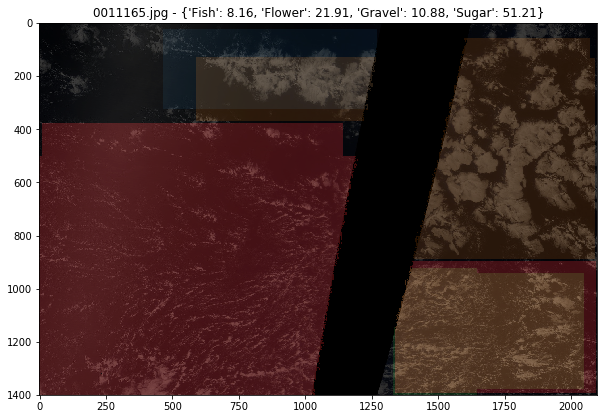

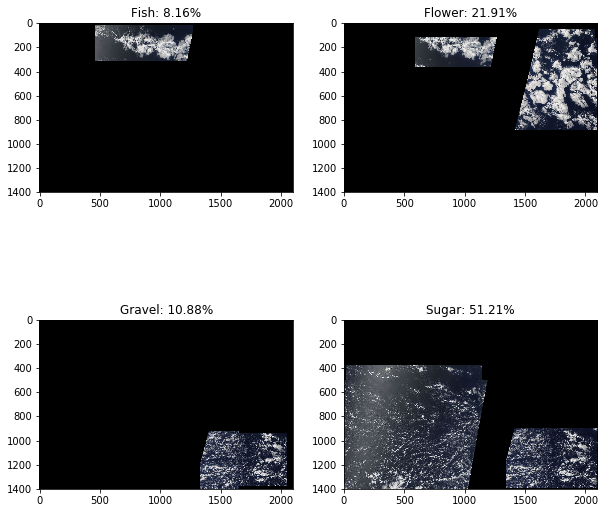

In [26]:
sample = random.choice(img_names)
print(sample)
print(list(labels[sample].keys()))

path_sample = os.path.join(basedir_train_img, sample)
img = imread(path_sample)
mask = np.zeros(IMG_SIZE, dtype=np.int).flatten()
for label, seg_str in labels[sample].items():
    label_num = label_enc[label]
    if seg_str:
        segment = np.array(seg_str.split(' ')).astype(np.int).reshape(-1, 2)
        for (start, length) in segment:
            mask[start:start + length] += label_num
mask = mask.reshape(IMG_SIZE, order='F')

plt.figure(figsize=(10, 10))
plt.imshow(img, alpha=1)
a_c = {}
for label in classes:
    code = label_enc[label]
    color = label_enc_color[label]
    img_l = np.zeros(IMG_SHAPE)
    mask_c = (mask & code == code)
    area = mask_c.sum() / (IMG_COLS * IMG_ROWS)
    if area:
        a_c[label] = np.round(100 * area, 2)
        img_l[mask_c] = color
        plt.imshow(img_l, alpha=0.3)
plt.title("{} - {}".format(name, a_c))
plt.show()

plt.figure(figsize=(10, 10))
for i, label in enumerate(classes):
    plt.subplot(int(len(classes) / 2), 2, i + 1)
    code = label_enc[label]
    img_c = img.copy()
    mask_c = (mask & code == code)
    area = mask_c.sum() / (IMG_COLS * IMG_ROWS)
    if area:
        img_c[~mask_c] = 0
        plt.imshow(img_c)
        plt.title("{}: {}%".format(label, np.round(area * 100, 2)))
plt.show()

### Additional checks

In [27]:
print(np.arange(6).reshape(2, 3, order='C'))
print(np.arange(6).reshape(2, 3, order='F'))
print(np.arange(6).reshape(2, 3, order='C').flatten())
print(np.arange(6).reshape(2, 3, order='F').flatten())

[[0 1 2]
 [3 4 5]]
[[0 2 4]
 [1 3 5]]
[0 1 2 3 4 5]
[0 2 4 1 3 5]


In [28]:
IMG_SHAPE = (1400, 2100, 3)

In [29]:
for name in img_names:
    path_img = os.path.join(basedir_train_img, name)
    img = imread(path_sample)
    assert img.shape == IMG_SHAPE, name